# Exploring US Flights Data


This jupyter Notebook consists the first project assigned by Associate Professor Panos Louridas for the course Applied Machine Learning at the 7th Semester in the Department of Management Science and Technology (DMST) of the Athens University of Economics and Business (AUEB).

> Department of Management Science and Technology <br/>
> Konstantinos Babetas 8160078  <br/>
> kbabetas@gmail.com <br/>
> Github: [kbabetas](https://github.com/kbabetas) <br/>
> LinkedIn: [kbabetas](https://www.linkedin.com/in/kbabetas/)

### Data

The data that we will be using are the [Airline On-Time Performance Data](https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time#) and we will use the 2018 data that can be found [here](<https://auebgr-my.sharepoint.com/:u:/g/personal/louridas_aueb_gr/EbeTzde1LddFmqNWBFWWxNcBj5tDR_zvzDHvqqcmnndeEQ?e=0pwH6j>).

The following answers assume that the data will reside in the same directory as this notebook.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [65]:
data_filename = '515364771_T_ONTIME_REPORTING.csv'
flights = pd.read_csv(data_filename, parse_dates=['FL_DATE'])

### Reading the Data

We begin by reading the data from the csv and because we do not want the Flight Date to be string we help pandas by stating that the Column FL_DATE is a date.


In [66]:
del flights['Unnamed: 19']

We start by deleting an unecessary column called 'Unnamed: 19' which was created because the csv file ends with a comma.
And now we can start with the first question of the Assignment.

### Dealing with Missing Data and Outliers

Before we begin with answering the given questions we need to check if there are any outliers or missing data in our file.

By checking if there are any rows with NaN values, we realize that apart from the non-cancelled and the non-delayed flights that have NaN values in the respective columns we have another 14.527 rows with NaN values.

All of those values can be found at the Tail Number Column.
By checking [this table from the Bureau of Transportational Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236) we confirm our findings as it shows that there is a significant percentage of missing values in the Tail Number column.

By searching on the [Reference Manual on Air Transport Statistics](https://ec.europa.eu/eurostat/documents/29567/3217334/Aviation-Manual-V11.pdf/19f6a843-d7c1-4cae-b93e-fcd5e3f59187) and the [internet](https://www.google.com/search?sxsrf=ACYBGNTksvKcusOsu-vQavfQg5mzE8UBjA%3A1571937886523&ei=Xt6xXZHIH4jTkwX4iqjYAg&q=can+a+flight+not+have+a+tail+number&oq=can+a+flight+not+have+a+tail+number&gs_l=psy-ab.12...9179.11872..13438...0.0..0.180.1616.0j10......0....1..gws-wiz.pb-4bUimj-8&ved=0ahUKEwiR79b6tLXlAhWI6aQKHXgFCisQ4dUDCAs) there is no formal reasoning for the missing tail number.

Apart from some conspiracy theories, according to the reference manual, the tail number is applicable to change if the flight has stops, so that could be the reason that the tail number is missing.

However, there was not an adequate reason found to exclude these rows from our analysis and, therefore, we decided to include them as they were not interfering with our results.

Our tests and the table at the website of the Bureau did not indicate the existence of any more missing or outlier values. Hence we do not need to make any modifications to our dataset at the moment and we continue as normal

In [67]:
nan_rows = flights
nan_rows = nan_rows.loc[:, ['FL_DATE', 'TAIL_NUM', 'CARRIER', 'ORIGIN',
                        'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME']]
nan_rows = nan_rows[nan_rows.isnull().T.any().T]
nan_rows

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME
2192,2018-01-01,NaN,F9,PBI,"West Palm Beach/Palm Beach, FL",TTN,"Trenton, NJ"
2193,2018-01-01,NaN,F9,LAS,"Las Vegas, NV",SAT,"San Antonio, TX"
2194,2018-01-01,NaN,F9,SAT,"San Antonio, TX",LAS,"Las Vegas, NV"
2195,2018-01-01,NaN,F9,ONT,"Ontario, CA",SAT,"San Antonio, TX"
2196,2018-01-01,NaN,F9,SAT,"San Antonio, TX",IAD,"Washington, DC"
2197,2018-01-01,NaN,F9,MSY,"New Orleans, LA",SAT,"San Antonio, TX"
2198,2018-01-01,NaN,F9,SAT,"San Antonio, TX",SAN,"San Diego, CA"
2199,2018-01-01,NaN,F9,SAN,"San Diego, CA",SAT,"San Antonio, TX"
2200,2018-01-01,NaN,F9,SAT,"San Antonio, TX",MSY,"New Orleans, LA"
2201,2018-01-01,NaN,F9,GRR,"Grand Rapids, MI",MCO,"Orlando, FL"


# Question 1

Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight departing from that airport has a delay. Take care of outliers: some airports may have a preposterously low number of flights. We are not interested in them. Your criterion for outliers will be the airports in the lowest 1% percentile in the number of flights.

After you have done that, go around your data again, but this time you will show the average and median delay for each airport. You may sort the results by either.

Finally, enrich your airport misery index by tabulating both the probability, in descending order, that you will experience a delay at a given airport, and the average and median delay that you are likely to experience. 

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

First, we have to get rid of the outliers, so we will try to find the total flights per airport:

In [69]:
airport_flights = flights.loc[:, ['ORIGIN', 'DEP_DELAY', 'FL_DATE']]
airport_flights = airport_flights.groupby('ORIGIN')
total_airport_flights = airport_flights.count()
total_airport_flights['TOTAL_FLIGHTS'] = total_airport_flights.FL_DATE
del total_airport_flights['FL_DATE']
total_airport_flights

,DEP_DELAY,TOTAL_FLIGHTS
ORIGIN,,
ABE,4078,4168
ABI,1981,2022
ABQ,23813,24047
ABR,737,745
ABY,995,1018
ACK,936,972
ACT,1536,1593
ACV,1429,1478
ACY,3249,3288


### Dealing with the Outliers
Now that we have found the total number of flights per airport, we can start dealing with the outliers. 
We want to remove the airports that exist in the lowest 1% percentile in the number of flights. Hence, we want to keep only the airports which have a higher number of flights.

In [70]:
airports = flights['ORIGIN'].value_counts()
airports = airports.reset_index()
airports.rename(columns = {'index' : 'ORIGIN', 'ORIGIN' : 'TOTAL_FLIGHTS'}, inplace = True)
airports.loc[airports.TOTAL_FLIGHTS >= airports.TOTAL_FLIGHTS.quantile(0.01)]


,ORIGIN,TOTAL_FLIGHTS
0,ATL,390046
1,ORD,332953
2,DFW,279298
3,DEN,235989
4,CLT,233317
5,LAX,221486
6,SFO,175849
7,PHX,173962
8,IAH,173806
9,LGA,171093


### Outliers
We want to see which airports are outliers so we can remove all the rows that include data of them in our initial dataframe

In [71]:
outliers = airports.loc[airports.TOTAL_FLIGHTS <= airports.TOTAL_FLIGHTS.quantile(0.01)]
outliers['ORIGIN']

354    CYS
355    IFP
356    ART
357    YNG
Name: ORIGIN, dtype: object

In [72]:
hierarchical_flights = flights[~flights.ORIGIN.isin(outliers['ORIGIN'])]

In [73]:
hierarchical_flights = hierarchical_flights.set_index(['ORIGIN'])
hierarchical_flights = hierarchical_flights.sort_index()
hierarchical_flights

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,,,,,,,,,,,,,,
ABE,2018-04-24,N297PQ,9E,"Allentown/Bethlehem/Easton, PA",ATL,"Atlanta, GA",1302.0,-5.0,1507.0,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ABE,2018-11-16,N593NN,OH,"Allentown/Bethlehem/Easton, PA",CLT,"Charlotte, NC",604.0,1.0,856.0,41.0,0.0,NaN,0.0,0.0,1.0,40.0,0.0,0.0
ABE,2018-05-13,N885AS,OO,"Allentown/Bethlehem/Easton, PA",DTW,"Detroit, MI",1245.0,-8.0,1431.0,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ABE,2018-07-23,862GA,G4,"Allentown/Bethlehem/Easton, PA",MYR,"Myrtle Beach, SC",1117.0,-6.0,1254.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ABE,2018-08-02,N591NN,OH,"Allentown/Bethlehem/Easton, PA",CLT,"Charlotte, NC",1158.0,19.0,1355.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ABE,2018-10-02,N562NN,OH,"Allentown/Bethlehem/Easton, PA",CLT,"Charlotte, NC",600.0,-13.0,807.0,-13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ABE,2018-07-23,862GA,G4,"Allentown/Bethlehem/Easton, PA",SFB,"Sanford, FL",1612.0,12.0,1838.0,16.0,0.0,NaN,0.0,0.0,0.0,4.0,0.0,12.0
ABE,2018-12-17,N922AT,DL,"Allentown/Bethlehem/Easton, PA",ATL,"Atlanta, GA",555.0,-5.0,749.0,-28.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ABE,2018-09-23,N583NN,OH,"Allentown/Bethlehem/Easton, PA",CLT,"Charlotte, NC",1645.0,-1.0,1853.0,-2.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


### Delayed Flights

Now that we have only the data that we want we can start examining the delays per airport.
However, not every flight experienced a delay and, as a result, we need to examine only the delayed flights.
Because of that we choose only the rows in which the Departure Delay is greater than zero.
Then, we calculate the number of delayed flights per airport and we divide that number with the number of total flights per airport that we found previously.
So now we have a new column which is called DEL_PERCENT which contains the probability of a flight being delayed at any given airport.
Finally, we choose to show only the Origin and the Delay Probability Columns as those are they only ones that are of interest to us, at least for now

In [74]:
delayed_flights = hierarchical_flights.loc[hierarchical_flights.DEP_DELAY>0.0]
delayed = delayed_flights
delayed = delayed.groupby('ORIGIN').count()
delayed['DEL_FLIGHTS'] = delayed['FL_DATE']
delayed['TOTAL'] = total_airport_flights['TOTAL_FLIGHTS']
delayed['DEL_PERCENT'] = delayed['DEL_FLIGHTS']/delayed['TOTAL']
delayed = delayed.reset_index()
delayed = delayed.loc[:, ['ORIGIN', 'DEL_PERCENT']]

In [75]:
delay_prob = delayed.set_index(['DEL_PERCENT'])
delay_prob = delay_prob.sort_index(level=['DEL_PERCENT'], ascending=False )
delay_prob = delay_prob.reset_index()
delay_prob



,DEL_PERCENT,ORIGIN
0,0.658730,OGD
1,0.650602,SCK
2,0.587072,MDW
3,0.584270,HYA
4,0.571082,DAL
5,0.543524,HOU
6,0.504505,OWB
7,0.492754,HGR
8,0.481229,HTS
9,0.475410,PPG


### Average and Median Delay

In order to calculate the average and median delay of all airports we first need to make a choice.
We can either calculate those metrics by including all the flights, even the ones where the flight departed eairler or on time, or only on those which were delayed.

Because the non-delayed flights would change a lot the metrics, the decision to focus only on the delayed flights to see which airport had the worst average and median delay was made.

In [76]:
agg_airport = delayed_flights.groupby('ORIGIN')['DEP_DELAY'].agg(['mean','median'])
agg_airport = agg_airport.reset_index()
agg_airport = agg_airport.set_index('mean')
agg_airport = agg_airport.sort_index()
agg_airport = agg_airport.reset_index()
agg_airport

,mean,ORIGIN,median
0,15.233333,WYS,6.0
1,16.851852,AKN,15.0
2,17.300689,ITO,7.0
3,18.000000,GST,11.0
4,21.928571,DLG,14.5
5,22.110345,OME,12.0
6,23.434529,HNL,8.0
7,23.485270,OGG,9.0
8,23.806081,OAK,12.0
9,24.565476,OTZ,13.5


### Final Results

Now we have created a table that shows the airports in descending order of the probability that we experience a delay along with the mean and median delay in those airports.

In [77]:
first_q = pd.merge(delay_prob, agg_airport, how='left', on='ORIGIN')
first_q.loc[:, ['DEL_PERCENT', 'ORIGIN', 'mean', 'median' ]]

,DEL_PERCENT,ORIGIN,mean,median
0,0.658730,OGD,30.903614,14.0
1,0.650602,SCK,38.913580,21.0
2,0.587072,MDW,26.619233,14.0
3,0.584270,HYA,61.269231,15.0
4,0.571082,DAL,26.842961,13.0
5,0.543524,HOU,25.861314,13.0
6,0.504505,OWB,59.303571,25.0
7,0.492754,HGR,58.161765,26.5
8,0.481229,HTS,41.390071,19.0
9,0.475410,PPG,106.448276,19.0


And now we can move to the second Question.

# Question 2

Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.


Then, go around your data again, but this time the criterion will be the average and median delay you may expect to have with an airline. Again we do not care about outliers.

And finally, as you would expect,  enrich your airline misery index by tabulating both the probability, in descending order, that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.

Note that because in the 2018 performance data airlines are only indicated by their code, you should also download the carrier lookup table from https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS, so that you can include airline names in your results.

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Total Flights per Airline

Now we want to do see how each airline performs in terms of flight delays.

We, again, do not care about all the available information, so mainly for convenience reasons we show only the Carrier and Departure Delay information from our initial dataframe.

Then we count the total flights completed by each airline.

In [78]:
airline_flights = flights.loc[:, ['CARRIER', 'DEP_DELAY']]
total_flights_airline = airline_flights.groupby('CARRIER').count()

total_flights_airline.rename(columns={'DEP_DELAY' : 'TOTAL_FLIGHTS'}, inplace=True)
total_flights_airline.reset_index()

,CARRIER,TOTAL_FLIGHTS
0,9E,235061
1,AA,902562
2,AS,243670
3,B6,298738
4,DL,945888
5,EV,197324
6,F9,117747
7,G4,95473
8,HA,83486
9,MQ,286014


### Delayed Flights per Airline

We need to calculate the delayed flights per airline, so we choose only the rows where the departure delay is greater than zero and then we count the flights.

In [79]:
delayed_airline = airline_flights.loc[airline_flights.DEP_DELAY>0.0].groupby('CARRIER').count()
delayed_airline.rename(columns={'DEP_DELAY' : 'DELAYED_FLIGHTS'}, inplace=True)
delayed_airline.reset_index()

,CARRIER,DELAYED_FLIGHTS
0,9E,64942
1,AA,317751
2,AS,66254
3,B6,125011
4,DL,286165
5,EV,53898
6,F9,53321
7,G4,32886
8,HA,21767
9,MQ,83546


We can now calculate the delay percentage by dividing the number of delayed flights with the total number of flights per airline.

Then we sort the airlines in descending order of the probability of having a flight delayed.

In [80]:
delayed_airline['DEL_PERCENT'] = delayed_airline['DELAYED_FLIGHTS']/total_flights_airline['TOTAL_FLIGHTS']
delayed_airline = delayed_airline.reset_index()
delayed_airline = delayed_airline.loc[:, ['DEL_PERCENT', 'CARRIER']]
delayed_airline = delayed_airline.set_index(['DEL_PERCENT'])
delayed_airline = delayed_airline.sort_index(ascending=False)
delayed_airline = delayed_airline.reset_index()
delayed_airline

,DEL_PERCENT,CARRIER
0,0.496346,WN
1,0.452844,F9
2,0.418464,B6
3,0.375588,OH
4,0.352054,AA
5,0.344453,G4
6,0.312145,VX
7,0.302536,DL
8,0.300299,UA
9,0.292929,NK


### Average and Median Delay

In order to calculate the average and median delay per airport again we decide to include in our calculations only the flights that were actually delayed.

Then we sort our results in descending order of the average delay experienced.

In [81]:
agg_airline = airline_flights.loc[airline_flights.DEP_DELAY>0.0]
agg_airline = agg_airline.groupby('CARRIER')['DEP_DELAY'].agg(['mean','median'])
agg_airline = agg_airline.reset_index()
agg_airline = agg_airline.set_index('mean')
agg_airline = agg_airline.sort_index(ascending = False)
agg_airline = agg_airline.reset_index()
agg_airline

,mean,CARRIER,median
0,61.865041,EV,31.0
1,54.693784,OO,24.0
2,53.945690,9E,25.0
3,51.562570,YV,23.0
4,50.856173,F9,25.0
5,49.588548,G4,22.0
6,47.006303,B6,24.0
7,46.784504,YX,25.0
8,46.655881,NK,19.0
9,45.336768,UA,20.0


### Final Results

Now we have created a table that shows the airlines in descending order of the probability that we experience a delay along with the mean and median delay in those airlines.

In [82]:
agg_airline = pd.merge(delayed_airline, agg_airline, how='left', on='CARRIER')
agg_airline =  agg_airline.loc[:, ['CARRIER', 'DEL_PERCENT', 'mean', 'median']]
agg_airline

,CARRIER,DEL_PERCENT,mean,median
0,WN,0.496346,25.382091,12.0
1,F9,0.452844,50.856173,25.0
2,B6,0.418464,47.006303,24.0
3,OH,0.375588,40.114597,17.0
4,AA,0.352054,37.123392,16.0
5,G4,0.344453,49.588548,22.0
6,VX,0.312145,34.926979,18.0
7,DL,0.302536,33.571667,13.0
8,UA,0.300299,45.336768,20.0
9,NK,0.292929,46.655881,19.0


Because though we are not very familiar with the airline codes as they are not used very often unlike the Airport codes usually we will be using the airline names that can be found [here](https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS).

**Disclaimer:**  As previously we assume that the csv resides in the same directory as this notebook for the following lines of code to work.

In [84]:
airlines_filename = 'L_UNIQUE_CARRIERS.csv_'
airlines =  pd.read_csv(airlines_filename)
airlines.rename(columns={'Code' : 'CARRIER'}, inplace=True)
airlines = pd.merge(airlines, agg_airline, how='right', on='CARRIER', indicator='exists')
airlines = airlines.set_index('DEL_PERCENT')
airlines = airlines.sort_index(level=['DEL_PERCENT'], ascending=False)
del airlines['exists']
airlines

,CARRIER,Description,mean,median
DEL_PERCENT,,,,
0.496346,WN,Southwest Airlines Co.,25.382091,12.0
0.452844,F9,Frontier Airlines Inc.,50.856173,25.0
0.418464,B6,JetBlue Airways,47.006303,24.0
0.375588,OH,PSA Airlines Inc.,40.114597,17.0
0.352054,AA,American Airlines Inc.,37.123392,16.0
0.344453,G4,Allegiant Air,49.588548,22.0
0.312145,VX,Virgin America,34.926979,18.0
0.302536,DL,Delta Air Lines Inc.,33.571667,13.0
0.300299,UA,United Air Lines Inc.,45.336768,20.0


# Question 3

Create a histogram that shows the distribution of departures for airports. That is, the x-axis will be bins containing flights and the y-axis will be the number of airports with departing flights in each particular bin.
____________________________________________________________________________________________________________________________________________________________________________________________

### Departures

First we will begin by finding the departed flights from each airport. 

We make it easier to do our calculations we remove any unecessary columns and we will work only with the Origin and the Count column.

In [85]:
departures = flights.groupby('ORIGIN')
departures = departures.count()
departures = departures.reset_index()
departures['COUNT'] = departures['FL_DATE']
departures = departures[['ORIGIN', 'COUNT']]
departures

,ORIGIN,COUNT
0,ABE,4168
1,ABI,2022
2,ABQ,24047
3,ABR,745
4,ABY,1018
5,ACK,972
6,ACT,1593
7,ACV,1478
8,ACY,3288
9,ADK,104


Because the number of airports and the number of flights per airport are impbalanced we will be using the logarithmic scale instead of the linear scale in our x-axis so as to present a better-looking plot and to make better sense of it.

We are confirming our hypothesis by printing the number of airports that exist in each bin as the majority of the airports have from 100 to 10000 flights, whereas only a few airports have less or more flights than these.

In [86]:
bins = np.logspace(0, 6, num=7)
bins = np.insert(bins, 0, 0)

In [87]:
counts = departures['COUNT'].value_counts(bins=bins).sort_index()
counts

(-0.001, 1.0]              0
(1.0, 10.0]                1
(10.0, 100.0]              8
(100.0, 1000.0]           91
(1000.0, 10000.0]        159
(10000.0, 100000.0]       77
(100000.0, 1000000.0]     22
Name: COUNT, dtype: int64

### Histogram

Now that all our data is ready, we can create our histogram.

We can see that what we previously saw in the bins now it is showed in a much better way.

We can also conclude, that most airports in the US are medium-sized by having an annual number of flights between 100 and 10.000 flights.

It is also worth mentioning that there are a very few airports in the US that have less than 100 flights per year and there are some very large ones that have over 10.000 flights.

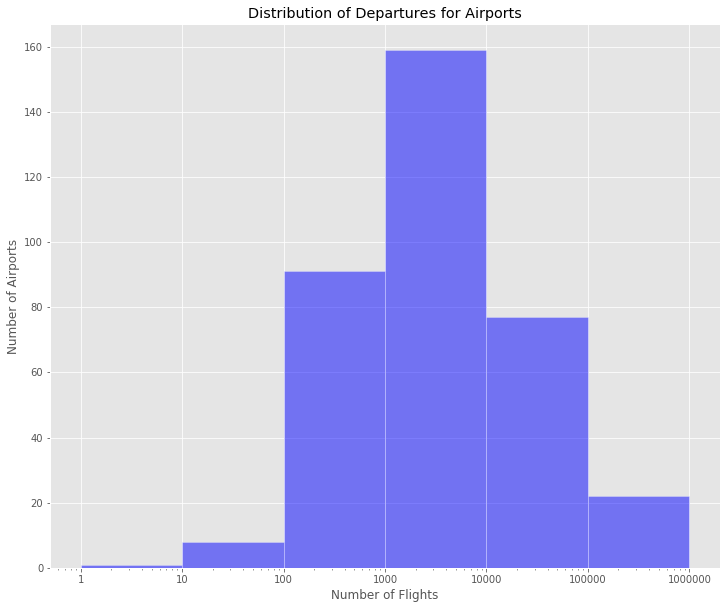

In [88]:
from matplotlib.ticker import ScalarFormatter
plt.style.use('ggplot')
departures.hist(bins=bins, color='blue',edgecolor='white', 
       alpha=0.5, figsize=(12, 10))
plt.gca().set_xscale("log")
plt.xlabel('Number of Flights')
plt.ylabel('Number of Airports')
plt.title('Distribution of Departures for Airports')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.show()

# Question 4


We are interested in the temporal distribution of delays, so create a plot that shows the number of flights and the number of delayed flights per month of year.

_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Delayed Flights per Month

We will begin our work with calculating the number of delayed flights per month of 2018.

We will first choose to work only with the flights that have been delayes and we will create a column which will contain the number of the month from the column FL_DATE which contains the Flight Date.

In [156]:
month_delayed = flights.loc[flights.DEP_DELAY>0]
month_delayed = month_delayed.loc[:, ['FL_DATE']]
month_delayed['month'] = month_delayed.FL_DATE.dt.month
month_delayed = month_delayed.loc[:, ['month']]
month_delayed = month_delayed['month'].value_counts(sort = False)
month_delayed = month_delayed.reset_index()
month_delayed.rename(columns={'index':'month', 'month':'counts'}, inplace=True)
month_delayed

,month,counts
0,1,183723
1,2,174962
2,3,199775
3,4,193204
4,5,215382
5,6,238353
6,7,246392
7,8,239323
8,9,167257
9,10,187187


### Total Flights per Month

Now we will make the same calculations as before, only now we will not limit ourselves to the delayed flights, but we will use all the flights that happened.

In [157]:
month_total = flights.loc[:, ['FL_DATE']]
month_total['month'] = month_total.FL_DATE.dt.month
month_total = month_total['month'].value_counts(sort = False)
month_total = month_total.reset_index()
month_total.rename(columns={'index':'month', 'month':'total_counts'}, inplace=True)
month_total

,month,total_counts
0,1,570118
1,2,520731
2,3,611987
3,4,596046
4,5,616529
5,6,626193
6,7,645299
7,8,644673
8,9,585749
9,10,616101


### Temporal Distribution

Now we create a temporal distribution of delays by creating a comparison table which includes both the previous data.

In [158]:
comparison = pd.merge(month_delayed, month_total, how='left',on='month')
comparison

,month,counts,total_counts
0,1,183723,570118
1,2,174962,520731
2,3,199775,611987
3,4,193204,596046
4,5,215382,616529
5,6,238353,626193
6,7,246392,645299
7,8,239323,644673
8,9,167257,585749
9,10,187187,616101


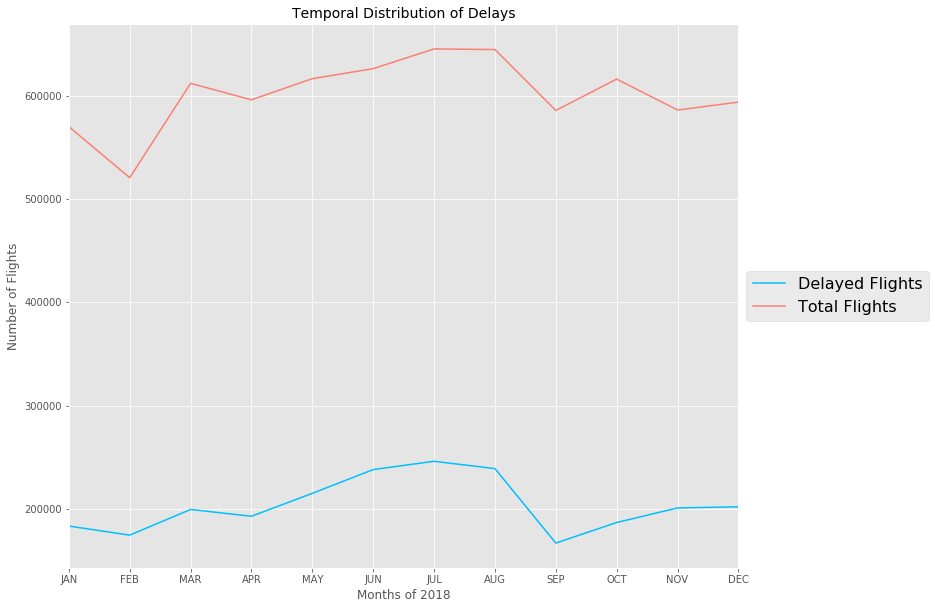

In [159]:
ax = plt.gca()
names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
comparison.plot(kind='line',x='month',y='counts',ax=ax, color='deepskyblue', figsize=(12, 10),
                label='Delayed Flights')
comparison.plot(kind='line',x='month',y='total_counts', color='salmon', ax=ax, label = 'Total Flights')
plt.xticks(comparison.month, names)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.xlabel('Months of 2018')
plt.ylabel('Number of Flights')
plt.title('Temporal Distribution of Delays', fontsize = 14)
plt.show()

### Alternative Comparison

The temporal distribution is one way to compare the number of delayed flights and the total flights per month.

But as we can see the difference between the two lines is pretty big.
So we decided to compare them in a different way and calculate the percentages of the Delayed flights and the non-Delayed flights

In [161]:
per_comparison = comparison
per_comparison['counts'] =  per_comparison['counts']/per_comparison['total_counts']
per_comparison['total_counts'] = 1.0 - per_comparison['counts']
per_comparison

,month,counts,total_counts
0,1,0.322254,0.677746
1,2,0.335993,0.664007
2,3,0.326437,0.673563
3,4,0.324143,0.675857
4,5,0.349346,0.650654
5,6,0.380638,0.619362
6,7,0.381826,0.618174
7,8,0.371232,0.628768
8,9,0.285544,0.714456
9,10,0.303825,0.696175


### Plot

By having this new comparison table we can create a new plot to compare the two metrics.

Since we are using percentages we have to take into account the diagrams and the plots that would take the most advantage of the situation.

The pie chart is not a very useful diagram, especially now that we would need 12 different pie charts for every month so we decided to plot a bar chart.

With the bar chart we can see exactly what the percentage of the delayed flights compared to the non-delayed was.

Furthermore, by looking at the plot we can realize that the percentage of the delayed flights remains pretty much the same throughout the year.

From the temporal distribution before we saw that as a number, the delayed flights had their ups and downs, but as a percentage it remains pretty stable.

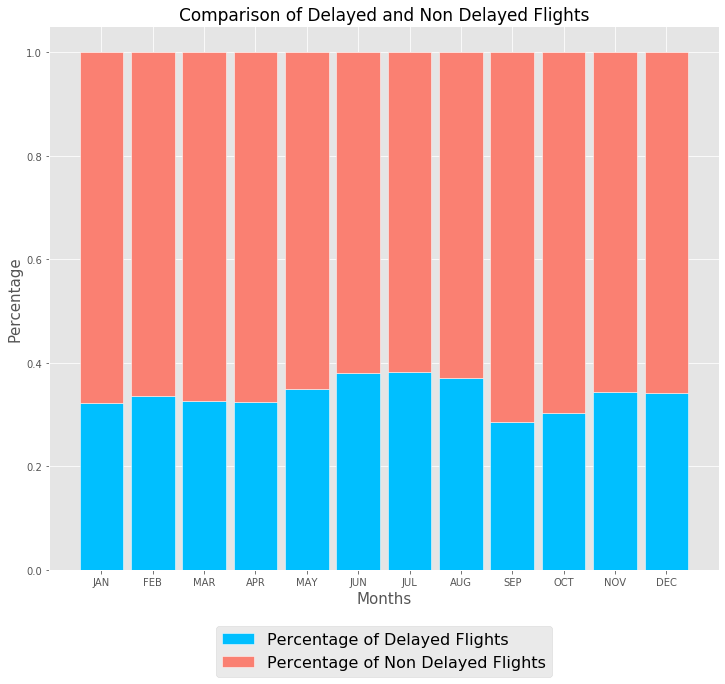

In [162]:
plt.rcParams["figure.figsize"] = [12, 10]
barWidth = 0.85
names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
plt.bar(per_comparison.month, per_comparison.counts, color='deepskyblue',
        edgecolor='white', width=barWidth, label='Percentage of Delayed Flights')
plt.bar(per_comparison.month, per_comparison.total_counts, bottom=per_comparison.counts
        , color='salmon', edgecolor='white', width=barWidth,
        label='Percentage of Non Delayed Flights')
plt.legend(loc='center', bbox_to_anchor=(0.5, - 0.15), prop={'size': 16})
plt.xticks(per_comparison.month, names)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Comparison of Delayed and Non Delayed Flights', fontsize = 17)
plt.show()


# Question 5

Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Mean Departure Delay



This time we will not only choose the flights that have experienced a delay as we want to see in total which airline has the best performance for every pair of origin and destination airports.

Then with those in hand we can calculate the mean departure delay between every pair of origin and destination airports and sort the results.

In [118]:
perf_flights = flights
perf_flights = perf_flights.loc[:, [ 'ORIGIN', 'DEST', 'CARRIER', 'DEP_DELAY']]
perf_flights = perf_flights.groupby(['ORIGIN', 'DEST', 'CARRIER'])
perf_flights = perf_flights.mean()
perf_flights = perf_flights.reset_index()
perf_flights.rename(columns={'DEP_DELAY':'MEAN_DELAY'}, inplace=True)
perf_flights = perf_flights.set_index(['ORIGIN', 'DEST', 'MEAN_DELAY'])
perf_flights = perf_flights.sort_index()
perf_flights

CARRIER
ORIGIN DEST MEAN_DELAY         
ABE    ATL   7.530387        DL
             10.433735       EV
             11.991379       9E
       CLT   5.063527        OH
       DTW   15.946507       OO
       FLL   40.708333       G4
       MDT   175.000000      OO
       MYR   7.892857        G4
       ORD   12.907801       OO
             13.338164       EV
       PGD   16.277778       G4
       PHL   9.292683        OH
       PIE   13.050633       G4
       SFB   15.493213       G4
ABI    DFW   8.027259        MQ
ABQ    ATL   3.684706        DL
       AUS   10.912500       F9
             15.702128       WN
             21.931624       G4
       BWI   10.849817       WN
       DAL   10.105861       WN
       DEN   2.727975        OO
             4.708955        YX
             4.809038        UA
             10.717476       WN
             24.560311       F9
       DFW   4.092832        YV
             9.121278        AA
       HOU   8.362669        WN
       IAH   0.130178        YX
...                         ...
XNA    EWR  -4.250000        EV
             44.126667       YX
       IAH   1.833333        OO
             8.281806        EV
             9.381166        YV
             11.809677       YX
       LAS   22.735849       G4
       LAX   9.900000        G4
       LGA   6.647059        YX
             28.548673       EV
             37.190789       9E
       MSP   4.863014        OO
             14.364162       9E
             20.753425       EV
             31.500000       DL
       ORD   2.333333        AA
             7.768194        MQ
             9.641791        OH
             9.671875        EV
             19.132530       YX
             33.764505       OO
       SFB   27.985401       G4
       SFO   3.257880        OO
       TXK   38.000000       EV
       VPS   11.733333       G4
YAK    CDV  -4.081921        AS
       JNU  -13.307263       AS
YNG    PIE   111.000000      G4
       SFB   15.000000       G4
YUM    PHX  -0.455669        OO

[13056 rows x 1 columns]

### Best Performance

Having calculated the mean departure delay we can now choose the best performing carrier on every pair.

Finally we will add the Name of every Carrier so that we can have a better understanding of which airline is the best for every possible pair of Origin and Destination Airport.

In [119]:
perf_flights = perf_flights.reset_index()
perf_flights = perf_flights.groupby(['ORIGIN', 'DEST'])
perf_flights = perf_flights.first()
perf_flights

MEAN_DELAY CARRIER
ORIGIN DEST                    
ABE    ATL     7.530387      DL
       CLT     5.063527      OH
       DTW    15.946507      OO
       FLL    40.708333      G4
       MDT   175.000000      OO
       MYR     7.892857      G4
       ORD    12.907801      OO
       PGD    16.277778      G4
       PHL     9.292683      OH
       PIE    13.050633      G4
       SFB    15.493213      G4
ABI    DFW     8.027259      MQ
ABQ    ATL     3.684706      DL
       AUS    10.912500      F9
       BWI    10.849817      WN
       DAL    10.105861      WN
       DEN     2.727975      OO
       DFW     4.092832      YV
       HOU     8.362669      WN
       IAH     0.130178      YX
       JFK     9.590909      B6
       LAS     9.285504      WN
       LAX     7.428571      OO
       MCI    11.045946      WN
       MCO     8.725275      F9
       MDW     9.216763      WN
       MSP    -0.960976      DL
       OAK     9.831214      WN
       ORD     2.390909      YX
       PDX     3.010000      WN
...                 ...     ...
VPS    SDF     5.605263      G4
       SGF    13.795181      G4
       TYS    22.741935      G4
       USA    -0.208333      G4
       XNA    10.800000      G4
WRG    KTN    -8.656425      AS
       PSG    -3.094972      AS
WYS    SLC    -2.485356      OO
XNA    ATL     7.982318      DL
       CLT     8.459530      OH
       CVG     6.413793      9E
       DCA    -3.555556      YX
       DEN    -3.000000      YX
       DFW     7.012077      MQ
       EWR    -4.250000      EV
       IAH     1.833333      OO
       LAS    22.735849      G4
       LAX     9.900000      G4
       LGA     6.647059      YX
       MSP     4.863014      OO
       ORD     2.333333      AA
       SFB    27.985401      G4
       SFO     3.257880      OO
       TXK    38.000000      EV
       VPS    11.733333      G4
YAK    CDV    -4.081921      AS
       JNU   -13.307263      AS
YNG    PIE   111.000000      G4
       SFB    15.000000      G4
YUM    PHX    -0.455669      OO

[6365 rows x 2 columns]

In [120]:
airlines_filename = 'L_UNIQUE_CARRIERS.csv_'
airlines =  pd.read_csv(airlines_filename)
perf_flights = perf_flights.reset_index()
airlines.rename(columns={'Code' : 'CARRIER'}, inplace=True)
perf_flights = pd.merge(perf_flights, airlines, how='left', on='CARRIER', indicator='exists')
del perf_flights['exists']
perf_flights = perf_flights.loc[:, ['ORIGIN', 'DEST', 'Description', 'CARRIER', 'MEAN_DELAY']]

In [121]:
perf_flights = perf_flights.set_index(['ORIGIN', 'DEST'])
perf_flights

Description CARRIER  MEAN_DELAY
ORIGIN DEST                                             
ABE    ATL      Delta Air Lines Inc.      DL    7.530387
       CLT         PSA Airlines Inc.      OH    5.063527
       DTW     SkyWest Airlines Inc.      OO   15.946507
       FLL             Allegiant Air      G4   40.708333
       MDT     SkyWest Airlines Inc.      OO  175.000000
       MYR             Allegiant Air      G4    7.892857
       ORD     SkyWest Airlines Inc.      OO   12.907801
       PGD             Allegiant Air      G4   16.277778
       PHL         PSA Airlines Inc.      OH    9.292683
       PIE             Allegiant Air      G4   13.050633
       SFB             Allegiant Air      G4   15.493213
ABI    DFW                 Envoy Air      MQ    8.027259
ABQ    ATL      Delta Air Lines Inc.      DL    3.684706
       AUS    Frontier Airlines Inc.      F9   10.912500
       BWI    Southwest Airlines Co.      WN   10.849817
       DAL    Southwest Airlines Co.      WN   10.105861
       DEN     SkyWest Airlines Inc.      OO    2.727975
       DFW        Mesa Airlines Inc.      YV    4.092832
       HOU    Southwest Airlines Co.      WN    8.362669
       IAH          Republic Airline      YX    0.130178
       JFK           JetBlue Airways      B6    9.590909
       LAS    Southwest Airlines Co.      WN    9.285504
       LAX     SkyWest Airlines Inc.      OO    7.428571
       MCI    Southwest Airlines Co.      WN   11.045946
       MCO    Frontier Airlines Inc.      F9    8.725275
       MDW    Southwest Airlines Co.      WN    9.216763
       MSP      Delta Air Lines Inc.      DL   -0.960976
       OAK    Southwest Airlines Co.      WN    9.831214
       ORD          Republic Airline      YX    2.390909
       PDX    Southwest Airlines Co.      WN    3.010000
...                              ...     ...         ...
VPS    SDF             Allegiant Air      G4    5.605263
       SGF             Allegiant Air      G4   13.795181
       TYS             Allegiant Air      G4   22.741935
       USA             Allegiant Air      G4   -0.208333
       XNA             Allegiant Air      G4   10.800000
WRG    KTN      Alaska Airlines Inc.      AS   -8.656425
       PSG      Alaska Airlines Inc.      AS   -3.094972
WYS    SLC     SkyWest Airlines Inc.      OO   -2.485356
XNA    ATL      Delta Air Lines Inc.      DL    7.982318
       CLT         PSA Airlines Inc.      OH    8.459530
       CVG         Endeavor Air Inc.      9E    6.413793
       DCA          Republic Airline      YX   -3.555556
       DEN          Republic Airline      YX   -3.000000
       DFW                 Envoy Air      MQ    7.012077
       EWR   ExpressJet Airlines LLC      EV   -4.250000
       IAH     SkyWest Airlines Inc.      OO    1.833333
       LAS             Allegiant Air      G4   22.735849
       LAX             Allegiant Air      G4    9.900000
       LGA          Republic Airline      YX    6.647059
       MSP     SkyWest Airlines Inc.      OO    4.863014
       ORD    American Airlines Inc.      AA    2.333333
       SFB             Allegiant Air      G4   27.985401
       SFO     SkyWest Airlines Inc.      OO    3.257880
       TXK   ExpressJet Airlines LLC      EV   38.000000
       VPS             Allegiant Air      G4   11.733333
YAK    CDV      Alaska Airlines Inc.      AS   -4.081921
       JNU      Alaska Airlines Inc.      AS  -13.307263
YNG    PIE             Allegiant Air      G4  111.000000
       SFB             Allegiant Air      G4   15.000000
YUM    PHX     SkyWest Airlines Inc.      OO   -0.455669

[6365 rows x 3 columns]

### Selecting the best airline for a certain pair of airports

Last but not least, if we want to determine the best airline for a particular pair of origin and destination airports it is very easy. 
We simply use loc and in a tuple we write the Origin and Destination Airport Code.

For instance, if we wanted to determine the best airline for the Lehigh Valley International Airport (ABE) and the Hartsfield–Jackson Atlanta International Airport (ATL) we would simply write the following line of code:

In [122]:
perf_flights.loc[('ABE', 'ATL')]

Description    Delta Air Lines Inc.
CARRIER                          DL
MEAN_DELAY                  7.53039
Name: (ABE, ATL), dtype: object

In [149]:
def best_airline(origin, destination):
    try:
        return perf_flights.loc[[(origin, destination)]]
    except Exception as exception:
        return 'The pair is not available'

Or if you don't want to write code you can simply use the best_airline function and give as parameters the Origin Airport Code and the Destination Airport Code.

So with the previous example:

In [150]:
best_airline('ABE', 'ATL')

,,Description,CARRIER,MEAN_DELAY
ORIGIN,DEST,,,
ABE,ATL,Delta Air Lines Inc.,DL,7.530387
